In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
 
# Define paths
base_dir = r'C:\Users\indra\Desktop\Step 2\Food'  # Your main folder containing subfolders
train_dir = r'C:\Users\indra\Desktop\Step 2\Train'
test_dir = r'C:\Users\indra\Desktop\Step 2\Test'
 
# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
 
# Collect all image paths
image_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))
 
# Split into train and test sets
train_images, test_images = train_test_split(image_paths, test_size=0.2, random_state=42)
 
# Function to copy files
def copy_files(images, destination_dir):
    for image in images:
        # Extract folder name from the original path (e.g., Dark Environment/Light Environment)
        relative_path = os.path.relpath(image, base_dir)
        folder_name = os.path.dirname(relative_path)
        # Create corresponding folder in train/test directory
        new_folder_path = os.path.join(destination_dir, folder_name)
        os.makedirs(new_folder_path, exist_ok=True)
 
        # Copy the image
        shutil.copy(image, new_folder_path)
 
# Copy train and test images
copy_files(train_images, train_dir)
copy_files(test_images, test_dir)
 
print(f"Copied {len(train_images)} images to {train_dir}")
print(f"Copied {len(test_images)} images to {test_dir}")

Copied 2265 images to C:\Users\indra\Desktop\Step 2\Train
Copied 567 images to C:\Users\indra\Desktop\Step 2\Test


## Importing Necessary Libraries

In [3]:
import os
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input,GlobalAveragePooling2D,SeparableConv2D
from tensorflow.keras.models import load_model
 
import warnings
warnings.filterwarnings("ignore")

## Image Data Generator Configuration for Data Augmentation and Preprocessing

In [4]:
hgt = 224

wdt = 224

bsze = 32

datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,

                             horizontal_flip=True,validation_split=0.2)

## Loading Training Data

In [12]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
# loads the training images from the specified directory using the configured ImageDataGenerator
train_data = datagen.flow_from_directory(r'C:\Users\indra\Desktop\Step 2\Train',
                                         target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='training')

Found 1657 images belonging to 10 classes.


## Loading Test Data

In [14]:
# loads the validation images from the specified directory using the same ImageDataGenerator.
validation_data = datagen.flow_from_directory(r'C:\Users\indra\Desktop\Step 2\Test',
                                              target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='validation')

Found 98 images belonging to 10 classes.


## Displaying Class Indices

In [15]:
print(train_data.class_indices)

{'Apple': 0, 'Bean': 1, 'Bread': 2, 'Cheese': 3, 'Egg': 4, 'Onion': 5, 'Orange': 6, 'Pasta': 7, 'Tomato': 8, 'sauce': 9}


## Visualizing Class Distribution

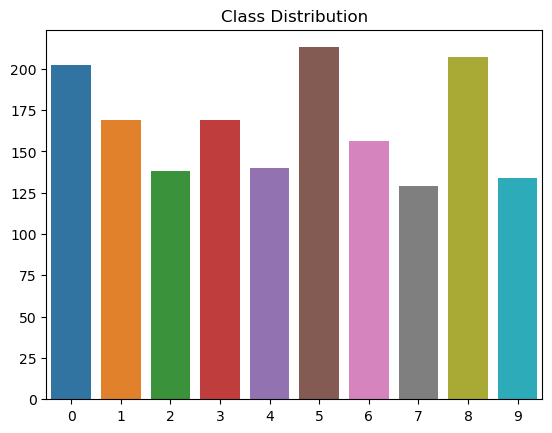

In [16]:
class_distribution = Counter(train_data.classes)

sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title('Class Distribution')

plt.show() 

# Build the CNN Model

In [17]:
# Build CNN model using Sequential
model = Sequential()

# Add convolutional layers followed by pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(hgt, wdt, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer to convert the 2D data to 1D
model.add(Flatten())

# Add a dense layer followed by a dropout layer
model.add(Dense(128, activation='relu'))

# Dropout layer with rate 0.05 to prevent overfitting
model.add(Dropout(0.05))

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))  # 11 classes based on your dataset

## Compile the Model

In [18]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [19]:
history = model.fit(train_data,
                    epochs=25,
                    validation_data=validation_data,
                    verbose=1)  # Set verbose to 1 to see progress per epoch

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 430s 8s/step - accuracy: 0.1658 - loss: 2.6151 - val_accuracy: 0.4694 - val_loss: 1.4142
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 386s 7s/step - accuracy: 0.5106 - loss: 1.3284 - val_accuracy: 0.7959 - val_loss: 0.6390
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 376s 7s/step - accuracy: 0.7652 - loss: 0.6295 - val_accuracy: 0.8163 - val_loss: 0.4958
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 388s 7s/step - accuracy: 0.8201 - loss: 0.4714 - val_accuracy: 0.8061 - val_loss: 0.6055
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.8725 - loss: 0.3614 - val_accuracy: 0.8980 - val_loss: 0.2398
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.9096 - loss: 0.2446 - val_accuracy: 0.8265 - val_loss: 0.4000
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.9169 - loss: 0.2235 - val_accuracy: 0.9796 - val_loss: 0.1263
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.9005 - loss: 0.2622 - val_accuracy: 0.9388 - v

## Evaluating the Model

In [20]:
# Evaluating the model on validation data
val_loss, val_accuracy = model.evaluate(validation_data)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9596 - loss: 0.1487
Validation Loss: 0.11489171534776688
Validation Accuracy: 0.9693877696990967


## Plot Training and Validation Accuracy & Loss

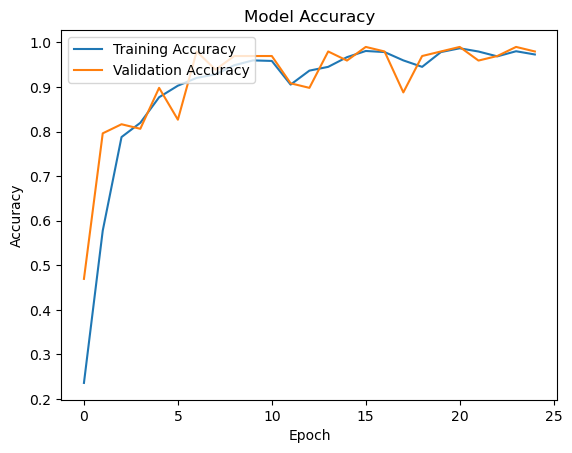

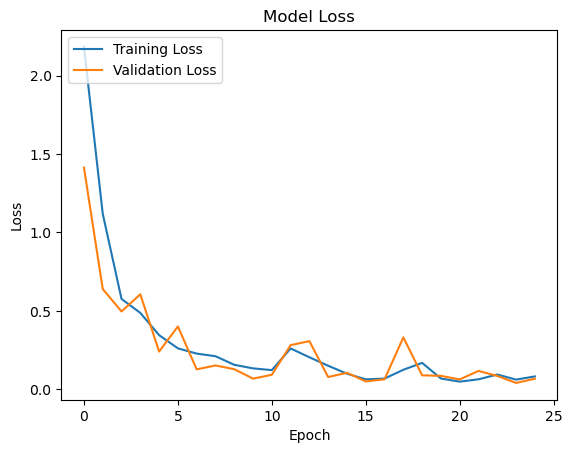

In [21]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

## Plot Some Sample Images with Class Names

In [22]:
class_names = ['Apple' 'Bean', 'Bread', 'Cheese', 'Egg', 'Onion', 'Orange', 'Pasta', 'Tomato', 'sauce']

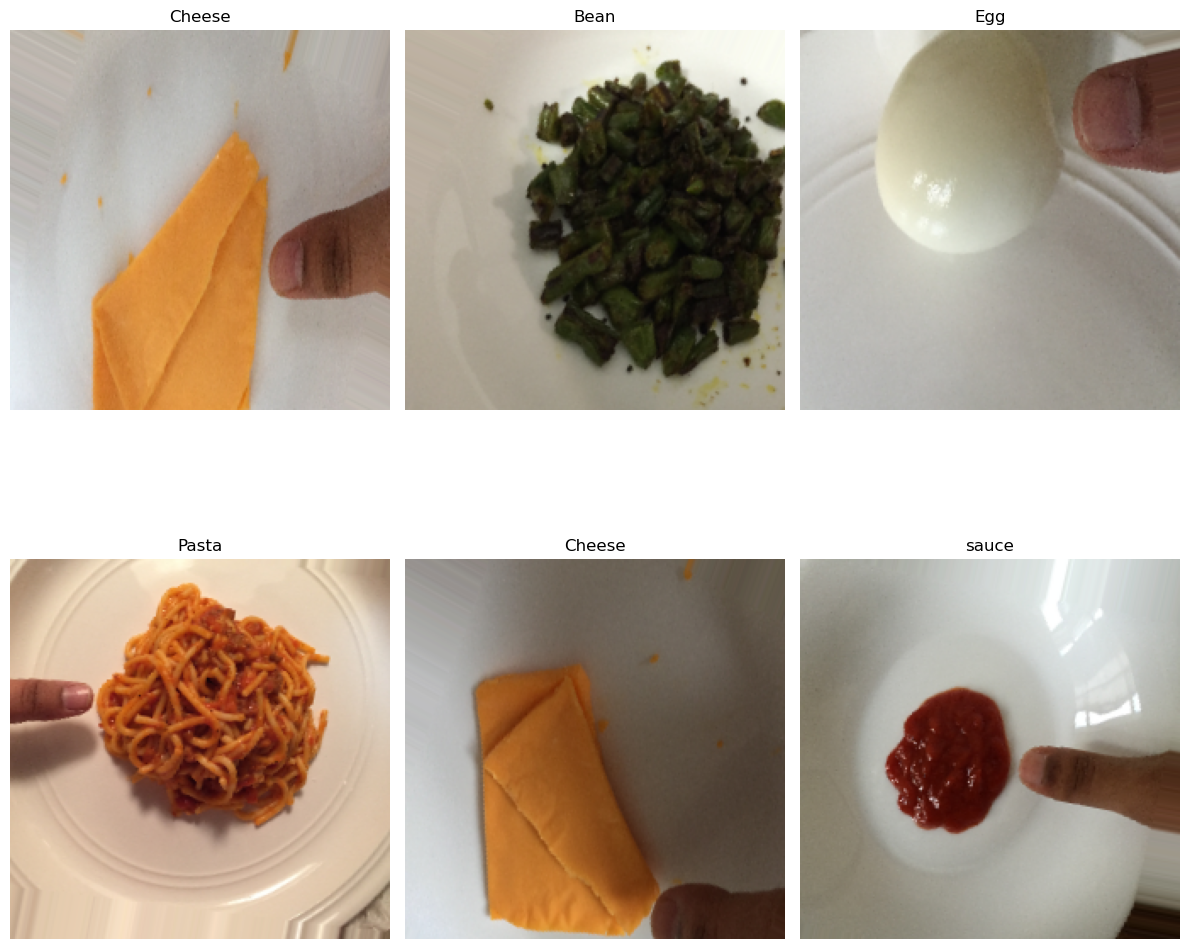

In [24]:
# Plot some sample images
def plot_sample_images(data_generator, class_indices, num_samples=6):
    plt.figure(figsize=(12, 12))
    
    # Retrieve one batch of images and labels
    images, labels = next(data_generator)
    
    # Reverse the class_indices dictionary to map index to class names
    idx_to_class = {v: k for k, v in class_indices.items()}
    
    for i in range(num_samples):
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(images[i])
        
        # Get the class label index and map it to class name
        class_idx = np.argmax(labels[i])
        class_name = idx_to_class[class_idx]
        
        plt.title(class_name)
        plt.axis('off')
    
    # Automatically adjust subplots to minimize gaps
    plt.tight_layout()
    plt.show()

# Call the function to plot sample images using train_data.class_indices
plot_sample_images(train_data, train_data.class_indices)

### Edge Case Testing

### Empty Input

This test checks how the model responds when it receives an empty input. Since CNNs expect image data, we simulate an empty or None input.

In [25]:
import numpy as np

def test_empty_input(model):
    try:
        empty_image = np.array([]).reshape(0, 0, 3)  # Empty image input
        result = model.predict(np.expand_dims(empty_image, axis=0))
        print(f"Test empty input: Passed. Output: {result}")
    except Exception as e:
        print(f"Test empty input: Failed. Error: {e}")

test_empty_input(model)


Test empty input: Failed. Error: Exception encountered when calling Conv2D.call().

Negative dimension size caused by subtracting 3 from 0 for '{{node sequential_1_1/conv2d_3_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](data, sequential_1_1/conv2d_3_1/convolution/ReadVariableOp)' with input shapes: [1,0,0,3], [3,3,3,32].

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 0, 0, 3), dtype=float32)


### Corrupted Image

Simulating the model by passing random noise as an image.

In [26]:
def test_corrupted_image(model):
    try:
        corrupted_image = np.random.rand(224, 224, 3) * 255  # Assuming 224x224 input size
        result = model.predict(np.expand_dims(corrupted_image, axis=0))
        print(f"Test corrupted image: Passed. Output: {result}")
    except Exception as e:
        print(f"Test corrupted image: Failed. Error: {e}")

test_corrupted_image(model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Test corrupted image: Passed. Output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


 ### Extremely Small or Large Images

Testing with images smaller or larger than the expected size (e.g., 1x1 or 1024x1024) to check how CNN handles resizing or different scales.

In [30]:
def test_extreme_image_sizes(model):
    try:
        small_image = np.random.rand(1, 1, 3) * 255
        large_image = np.random.rand(1024, 1024, 3) * 255

        # Test small image
        small_result = model.predict(np.expand_dims(small_image, axis=0))
        print(f"Test small image: Passed. Output: {small_result}")

        # Test large image
        large_result = model.predict(np.expand_dims(large_image, axis=0))
        print(f"Test large image: Passed. Output: {large_result}")
    except Exception as e:
        print(f"Test extreme image sizes: Failed. Error: {e}")

test_extreme_image_sizes(model)


Test extreme image sizes: Failed. Error: Graph execution error:

Detected at node sequential_1_1/conv2d_3_1/add defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\indra\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\indra\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\indra\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\indra\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\indra\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\indra\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\indra\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\indra\anaconda3\Lib\asyncio\events.py", line 80, in _

### Grayscale vs. RGB

If the model expects RGB images, passing grayscale images can test how robust the model is to such variations.

In [31]:
def test_grayscale_image(model):
    try:
        grayscale_image = np.random.rand(224, 224) * 255  # Grayscale image
        grayscale_image = np.stack([grayscale_image] * 3, axis=-1)  # Stack to create 3 channels
        result = model.predict(np.expand_dims(grayscale_image, axis=0))
        print(f"Test grayscale image: Passed. Output: {result}")
    except Exception as e:
        print(f"Test grayscale image: Failed. Error: {e}")

test_grayscale_image(model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Test grayscale image: Passed. Output: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


### Unseen Classes

Testing the model with images belonging to unseen classes (i.e., classes it wasn't trained on). This will help to see how it generalizes.

In [32]:
def test_unseen_classes(model, unseen_image):
    try:
        unseen_image = np.random.rand(224, 224, 3) * 255  # Random noise as a proxy for unseen class
        result = model.predict(np.expand_dims(unseen_image, axis=0))
        print(f"Test unseen class: Passed. Output: {result}")
    except Exception as e:
        print(f"Test unseen class: Failed. Error: {e}")

test_unseen_classes(model, "C:/Users/indra/Desktop/Step 2/Unseen Classes")  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Test unseen class: Passed. Output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### zero-pixel image (Completely Black)

In [34]:

def test_zero_pixel_image(model):
    try:
        zero_image = np.zeros((224, 224, 3))  # Completely black image
        result = model.predict(np.expand_dims(zero_image, axis=0))
        print(f"Test zero-pixel image: Passed. Output: {result}")
    except Exception as e:
        print(f"Test zero-pixel image: Failed. Error: {e}")

test_zero_pixel_image(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Test zero-pixel image: Passed. Output: [[3.0074764e-12 2.8768642e-05 1.1633440e-03 9.9850464e-01 1.9819535e-07
  2.8768969e-07 3.0251220e-04 2.7752017e-07 4.8983309e-12 9.0911048e-09]]
